In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os

In [3]:
slice_df = pd.read_csv("slice_csv_files/average_output/azim_average.csv")
# slice_16_df = pd.read_csv("azim_average_16_slices.csv")

In [4]:
def plot_flow_variable(slice_df, var, min_val=None, max_val=None, n_contour=11, ax=None):
    slice_array = slice_df.pivot(index="z", columns="r", values=var).to_numpy()
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(9,10))
    else:
        fig = ax.figure
    if min_val is None:
        min_val = slice_df[var].min()
    if max_val is None:
        max_val = slice_df[var].max()
    cmap = mpl.cm.gray
    bounds = np.linspace(min_val, max_val, n_contour)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend="both")
    plot = ax.imshow(slice_array, origin="lower", cmap=cmap, norm=norm)
    fig.colorbar(plot, ax=ax)
    plt.show()
    return

slice_csv_files\intermediate\cyl_slice_0.csv


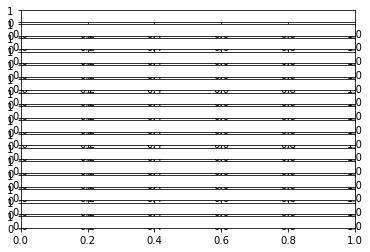

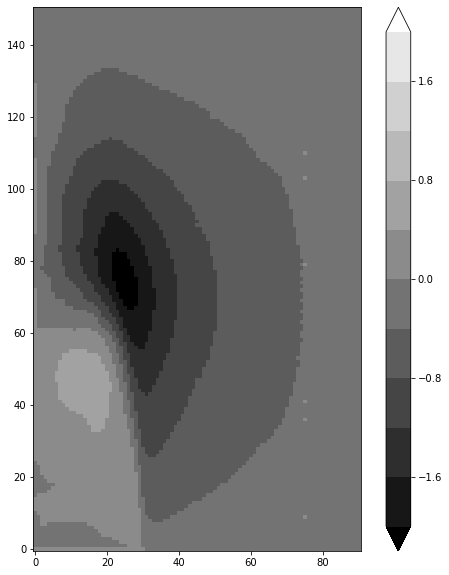

slice_csv_files\intermediate\cyl_slice_1.csv


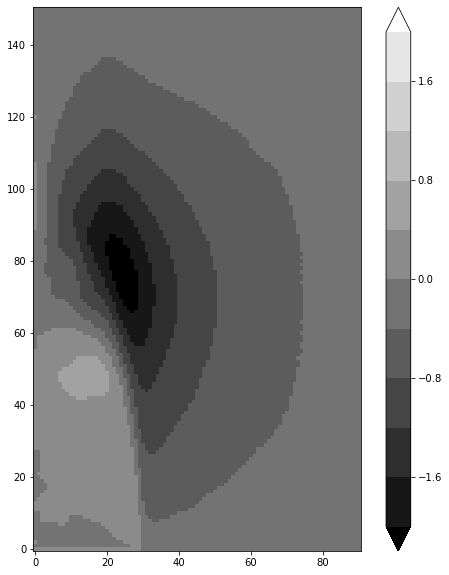

slice_csv_files\intermediate\cyl_slice_10.csv


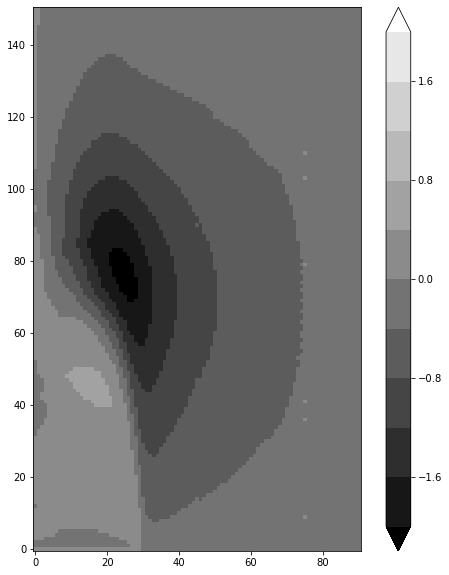

slice_csv_files\intermediate\cyl_slice_11.csv


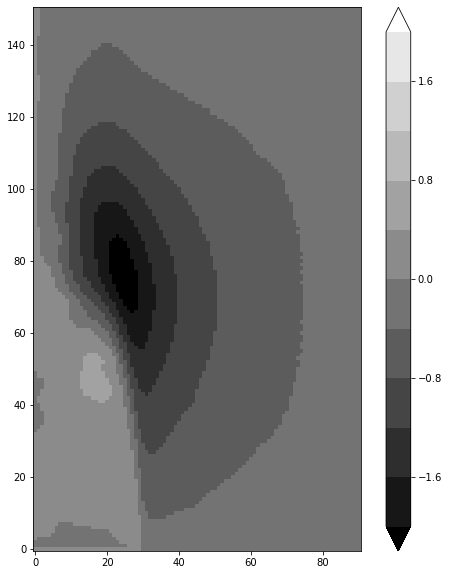

slice_csv_files\intermediate\cyl_slice_12.csv


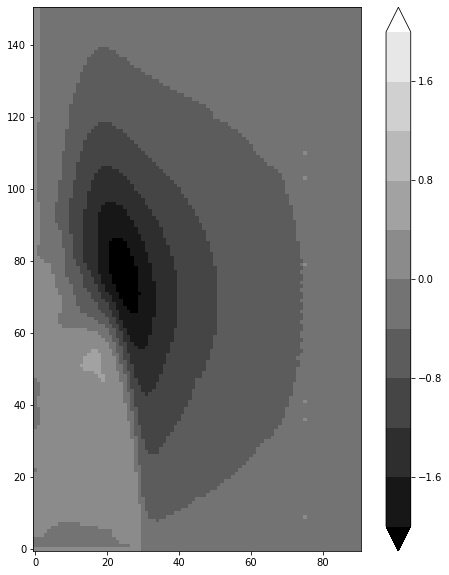

slice_csv_files\intermediate\cyl_slice_13.csv


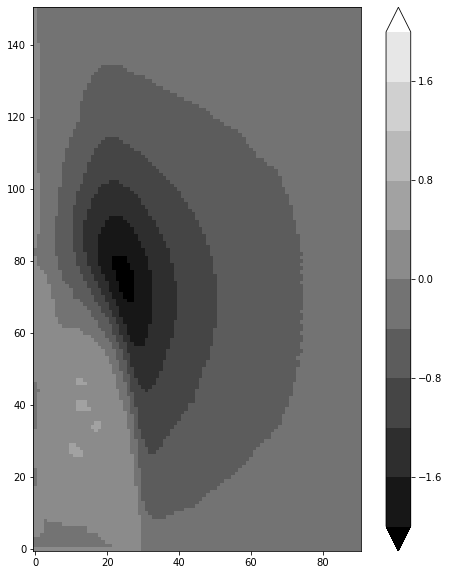

slice_csv_files\intermediate\cyl_slice_14.csv


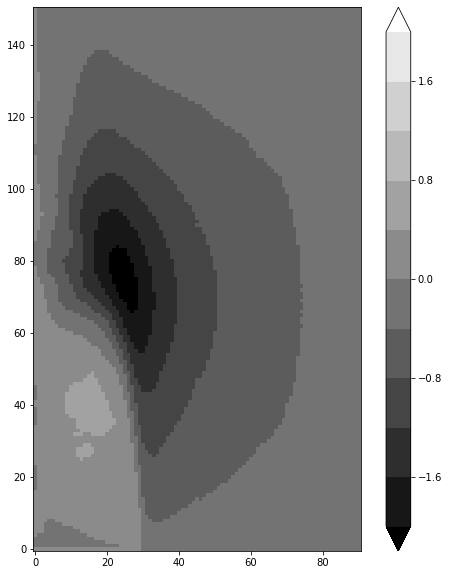

slice_csv_files\intermediate\cyl_slice_15.csv


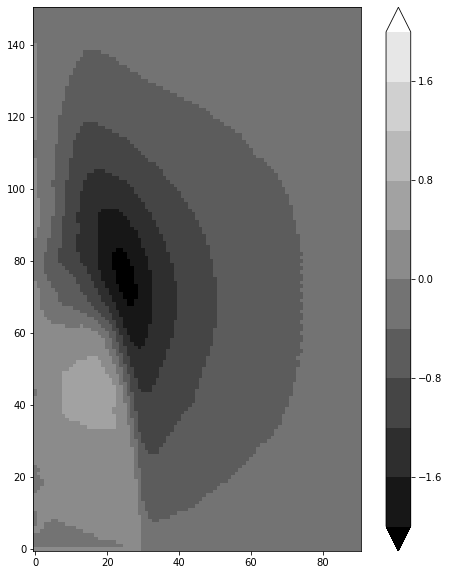

slice_csv_files\intermediate\cyl_slice_2.csv


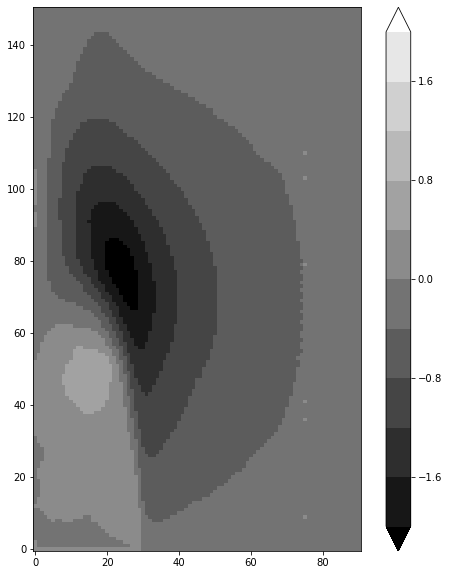

slice_csv_files\intermediate\cyl_slice_3.csv


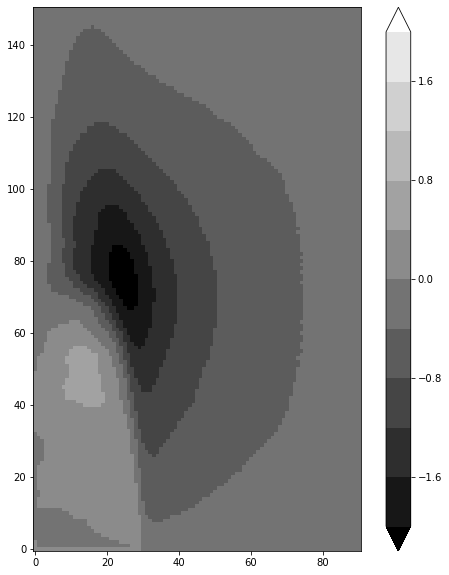

slice_csv_files\intermediate\cyl_slice_4.csv


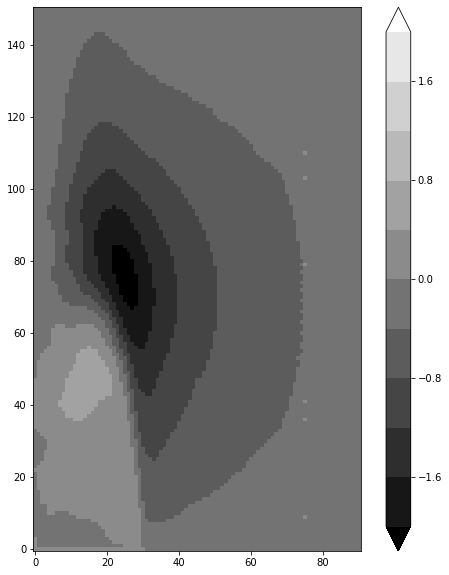

slice_csv_files\intermediate\cyl_slice_5.csv


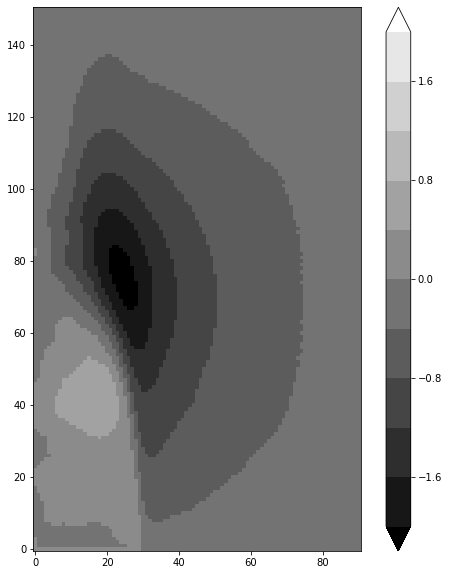

slice_csv_files\intermediate\cyl_slice_6.csv


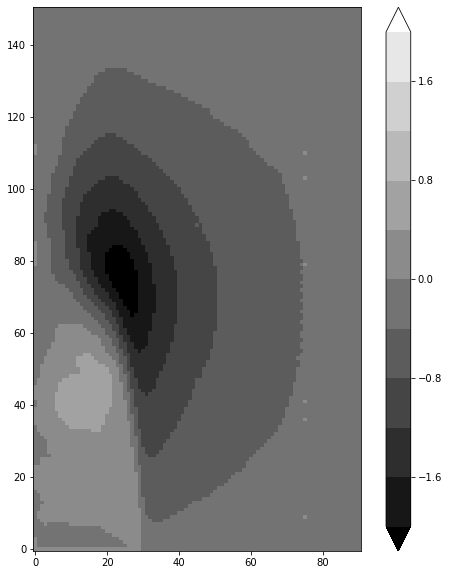

slice_csv_files\intermediate\cyl_slice_7.csv


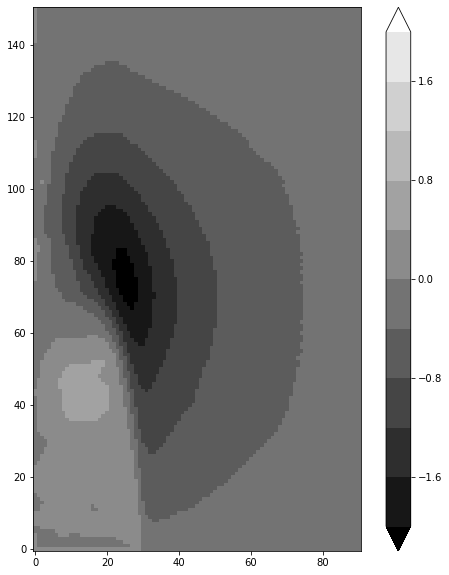

slice_csv_files\intermediate\cyl_slice_8.csv


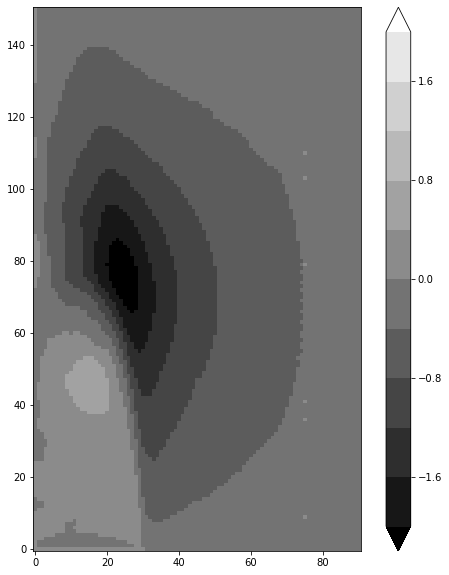

slice_csv_files\intermediate\cyl_slice_9.csv


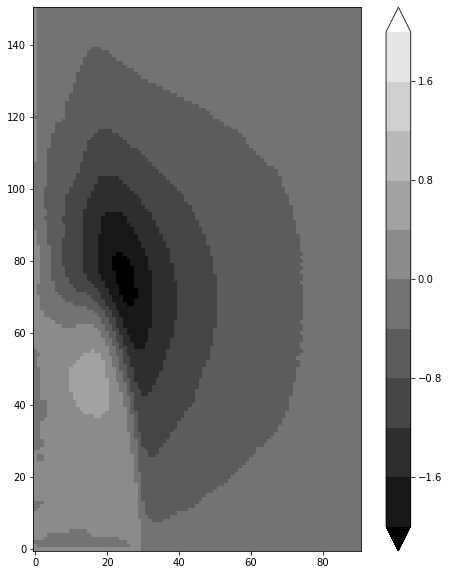

In [7]:
intermediate_dir = os.path.join("slice_csv_files", "intermediate")
cyl_slices_list = glob.glob(os.path.join(intermediate_dir, "*.csv"))
slice_number = len(cyl_slices_list)
fig, axs = plt.subplots(slice_number, 1)
cyl_slice_dfs = []
for cyl_slice, ax in zip(cyl_slices_list, axs):
    print(cyl_slice)
    cyl_slice_df = pd.read_csv(cyl_slice)
    plot_flow_variable(cyl_slice_df, var="u_mean_r", min_val=-2, max_val=2)
    cyl_slice_dfs.append(cyl_slice_df)
    


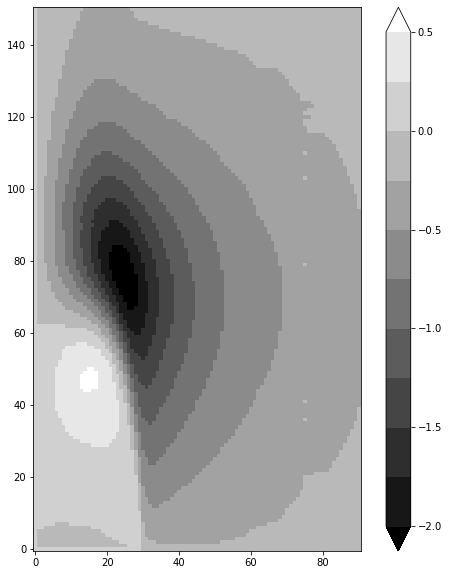

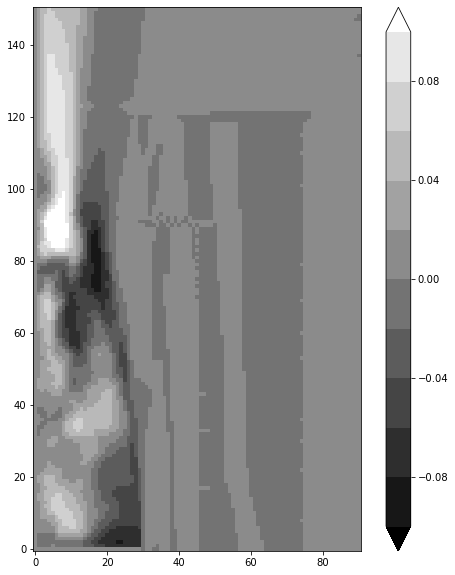

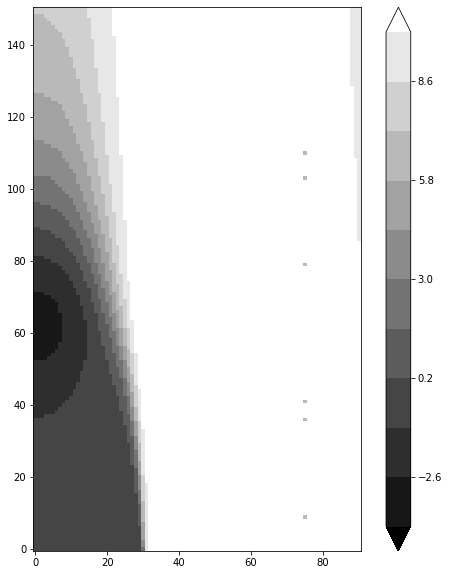

In [30]:
coords = ["r", "t", "z"]
u_vars = [f"u_mean_{coord}" for coord in coords]
min_vals = [-2, -0.1, -4]
max_vals = [0.5, 0.1, 10]
for u_var, min_val, max_vals in zip(u_vars, min_vals, max_vals):
    plot_flow_variable(slice_df, var=u_var, min_val=min_val, max_val=max_vals, n_contour=11)

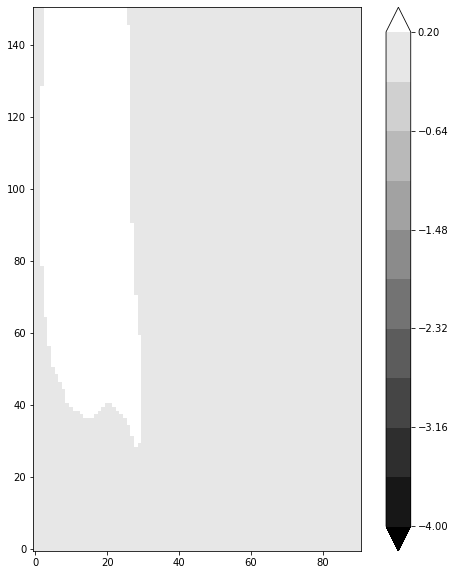

In [123]:
plot_flow_variable(slice_16_df, var="R_rz", min_val=-4, max_val=0.2, n_contour=11)

<AxesSubplot:>

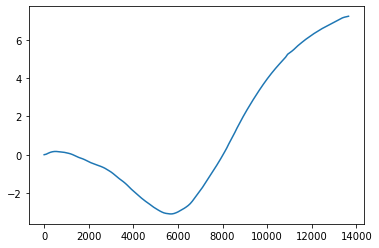

In [120]:
slice_df.u_mean_z[slice_df.r == 0].plot()